In [1]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,f1_score,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import data
# load data
data = pd.read_csv('datasets_11167_15520_train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.shape

(2000, 21)

In [4]:
# data preprocessing
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# checking null value in dataset
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.size

42000

In [8]:
# bluetooth value counts
data['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [9]:
# dual sim value counts
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [10]:
# 4G value counts
data['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [11]:
#  3G value counts
data['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [12]:
# wifi value counts
data['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [13]:
# price range value counts
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [14]:
# checking correlation of day data
corr = data.corr()
corr['price_range'].sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

# Visuallization

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>],

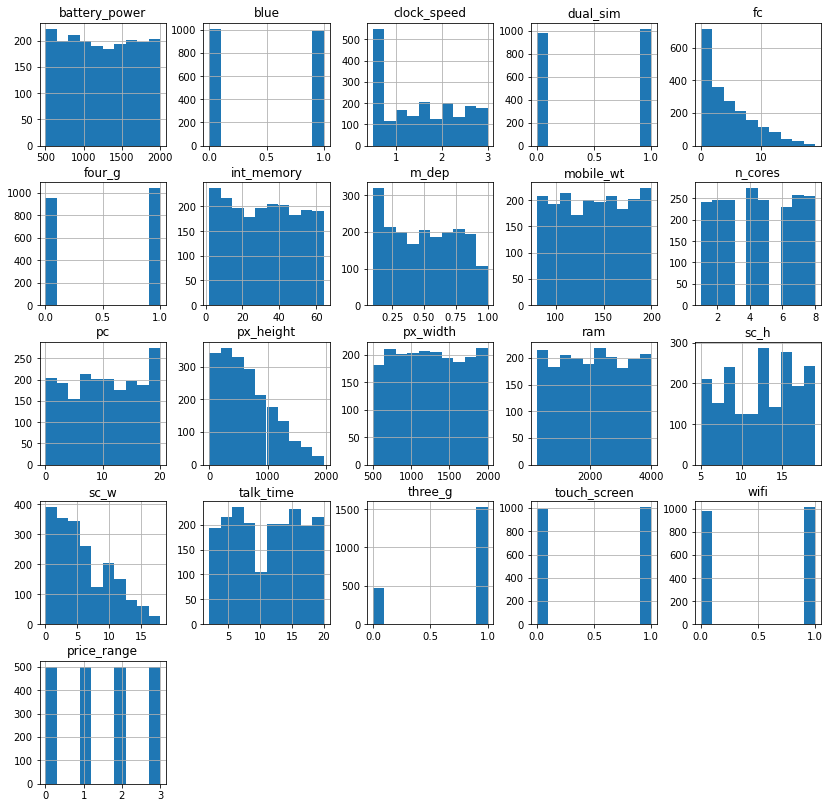

In [15]:
data.hist(figsize=(14,14))

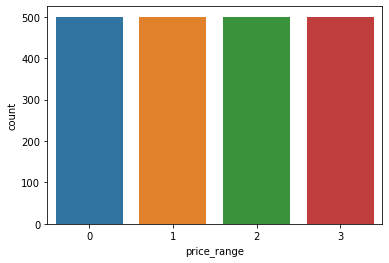

In [16]:
sns.countplot(data['price_range'])
plt.show()

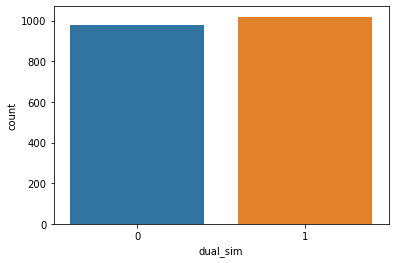

In [17]:
sns.countplot(data['dual_sim'])
plt.show()

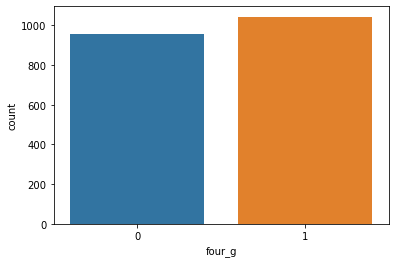

In [18]:
sns.countplot(data['four_g'])
plt.show()

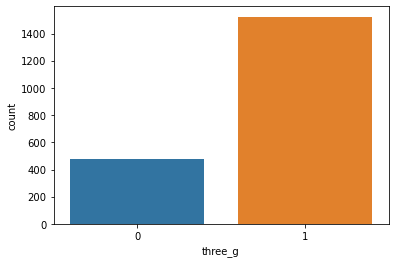

In [19]:
sns.countplot(data['three_g'])
plt.show()

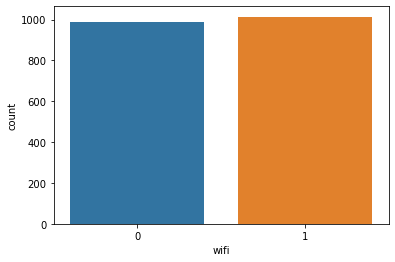

In [20]:
sns.countplot(data['wifi'])
plt.show()

<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

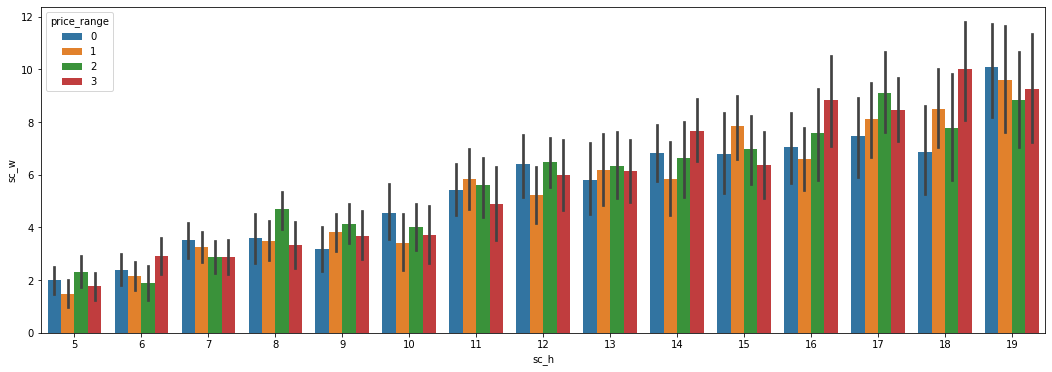

In [21]:
#Bar plot for Screen Height and Screen width distribution of price range
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data['sc_h'],data['sc_w'],hue=data['price_range'])

<AxesSubplot:xlabel='clock_speed', ylabel='price_range'>

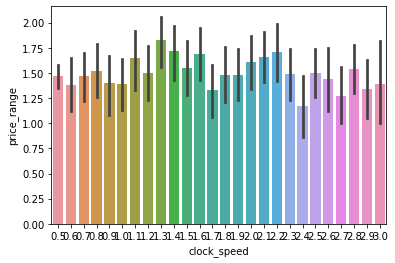

In [22]:
#Bar plot for clock speed distribution of price range
sns.barplot(data['clock_speed'],data['price_range'])

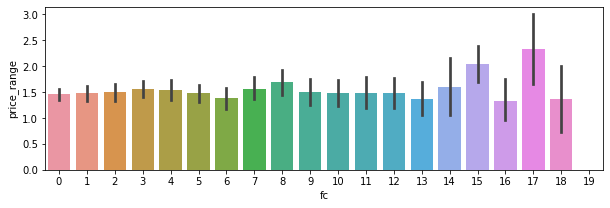

In [23]:
#Bar plot for Front Camera mega pixels distribution of price range
fig, ax = plt.subplots(figsize=(10,3))
sns.barplot(data['fc'],data['price_range'])
plt.show()

<AxesSubplot:xlabel='int_memory', ylabel='price_range'>

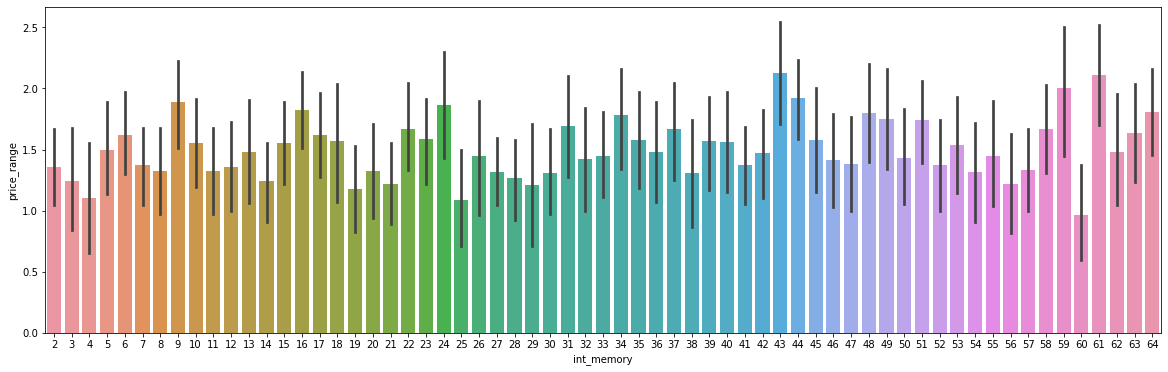

In [24]:
#Bar plot for Internal Memory distribution of price range
fig = plt.figure(figsize=(20,6))
sns.barplot(data['int_memory'],data['price_range'])

<AxesSubplot:xlabel='talk_time', ylabel='price_range'>

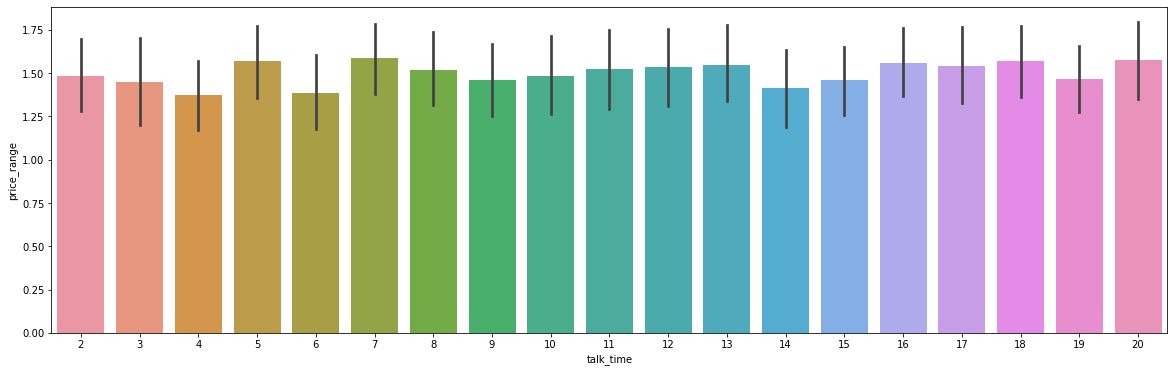

In [25]:
#Bar plot for single battery charge distribution of price range
fig = plt.figure(figsize=(20,6))
sns.barplot(data['talk_time'],data['price_range'])

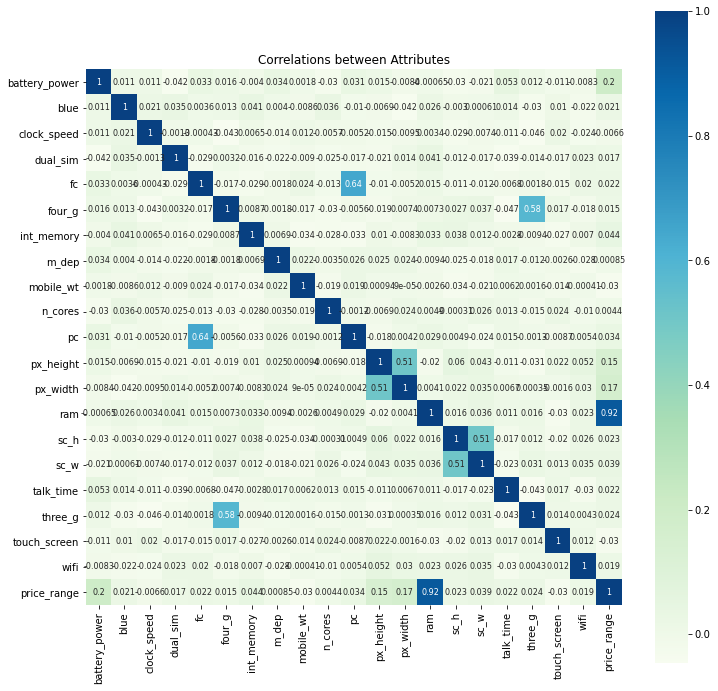

In [26]:
# Before going through machine learning applications, let's see the correlation btw features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

# Data preprocessing

In [27]:
# train_test_split
x = data.iloc[:,:-1]
y = data.price_range

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
x_train.shape

(1600, 20)

In [30]:
x_test.shape

(400, 20)

In [31]:
# Linear regression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.9155663780548012

In [32]:
y_test

115     3
1779    3
1449    2
145     3
1009    1
       ..
470     3
1661    1
1896    0
28      2
1510    1
Name: price_range, Length: 400, dtype: int64

In [33]:
y_predict

array([ 2.81473830e+00,  2.73939662e+00,  1.61463662e+00,  3.05531163e+00,
        1.04604953e+00,  3.33131287e+00,  2.56414192e+00,  2.59747851e+00,
        9.76027995e-01,  3.45907635e+00,  2.05211010e+00,  2.94792588e+00,
       -3.49034231e-01,  1.13624091e+00,  1.62918735e-01,  2.99797630e+00,
        1.60263168e+00,  3.16419571e+00,  2.34874234e+00,  2.03496911e+00,
        3.21711330e+00,  2.31685993e+00,  3.64793305e-01,  1.23889033e+00,
       -3.84053315e-01, -9.72755753e-03,  2.37996704e+00,  3.01182762e+00,
        1.10968887e+00,  1.20379687e+00,  1.68856851e+00,  1.60602986e-01,
        3.20460475e+00,  2.38780352e+00,  1.73730452e+00,  1.87092674e+00,
        8.82050340e-01,  6.51390592e-01,  2.29146677e+00, -3.02883669e-01,
        2.97733303e+00,  1.79079933e+00,  2.01206467e+00,  3.93478543e-01,
        6.37293759e-01,  3.21302744e+00,  1.42169392e+00,  2.72406566e-01,
        1.20793640e+00,  1.49646458e+00,  1.00778160e+00,  2.44586033e+00,
        2.25211765e+00,  

In [34]:
pd.crosstab(y_test,y_predict)

col_0,-0.814074,-0.761543,-0.602931,-0.579654,-0.531912,-0.499868,-0.451618,-0.384053,-0.380787,-0.364377,...,3.402470,3.445615,3.459076,3.498754,3.521648,3.547113,3.589188,3.669750,3.679832,3.740772
price_range,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [35]:
# Logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.64

In [36]:
y_test

115     3
1779    3
1449    2
145     3
1009    1
       ..
470     3
1661    1
1896    0
28      2
1510    1
Name: price_range, Length: 400, dtype: int64

In [37]:
y_predict

array([3, 3, 2, 3, 0, 3, 3, 3, 1, 3, 2, 3, 0, 2, 1, 3, 2, 3, 3, 2, 3, 3,
       0, 1, 0, 0, 2, 3, 1, 1, 2, 1, 2, 3, 2, 1, 0, 0, 3, 0, 3, 2, 1, 0,
       1, 3, 3, 0, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 2, 3, 2, 2, 0, 2, 2, 2, 3, 3, 1, 2, 3, 0, 1, 0, 1, 2, 1, 2,
       3, 3, 3, 2, 2, 3, 3, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 3, 1, 0, 3, 3,
       2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 2, 3, 1, 3, 3, 0, 3, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 3, 0, 3, 3, 1, 3, 2, 1, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 3, 3, 3, 2, 1, 1, 1, 2, 1, 2, 3, 2, 3, 0, 2,
       2, 3, 2, 1, 1, 1, 3, 3, 2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 1, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 2, 1, 3, 1, 2, 0, 3, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       3, 1, 0, 3, 0, 2, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 0, 2, 1, 3, 1, 2,
       0, 1, 1, 2, 3, 3, 0, 3, 2, 1, 0, 3, 3, 1, 2, 1, 1, 3, 2, 0, 1, 3,
       2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 1, 3, 2, 1, 3, 0, 3, 3, 0, 0, 1, 1,
       2, 0, 0, 2, 1, 0, 1, 3, 1, 1, 2, 0, 0, 3, 0,

In [38]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3
price_range,,,,
0,73,18,1,0
1,16,58,18,5
2,1,28,49,31
3,0,0,26,76


In [39]:
confusion_matrix(y_test,y_predict)

array([[73, 18,  1,  0],
       [16, 58, 18,  5],
       [ 1, 28, 49, 31],
       [ 0,  0, 26, 76]], dtype=int64)

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        92
           1       0.56      0.60      0.58        97
           2       0.52      0.45      0.48       109
           3       0.68      0.75      0.71       102

    accuracy                           0.64       400
   macro avg       0.64      0.65      0.64       400
weighted avg       0.64      0.64      0.64       400



In [41]:
# decision tree model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.845

In [42]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3
price_range,,,,
0,85,7,0,0
1,7,81,9,0
2,0,18,78,13
3,0,0,8,94


In [43]:
confusion_matrix(y_test,y_predict)

array([[85,  7,  0,  0],
       [ 7, 81,  9,  0],
       [ 0, 18, 78, 13],
       [ 0,  0,  8, 94]], dtype=int64)

In [44]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        92
           1       0.76      0.84      0.80        97
           2       0.82      0.72      0.76       109
           3       0.88      0.92      0.90       102

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.84      0.84       400



In [45]:
# random forest classifier model
model = RandomForestClassifier(random_state=10,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8775

In [46]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3
price_range,,,,
0,86,6,0,0
1,9,81,7,0
2,0,12,90,7
3,0,0,8,94


In [47]:
# KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.93

In [48]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3
price_range,,,,
0,90,2,0,0
1,4,89,4,0
2,0,5,100,4
3,0,0,9,93


In [49]:
y_predict = model.predict(x_test)

In [50]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[ 90   2   0   0]
 [  4  89   4   0]
 [  0   5 100   4]
 [  0   0   9  93]]


<AxesSubplot:>

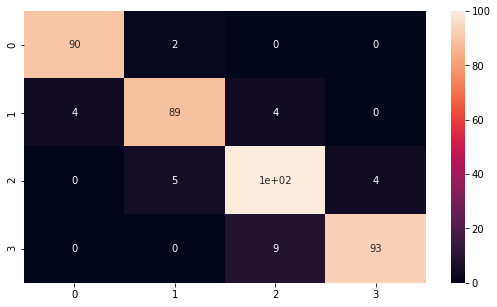

In [51]:
plt.figure(figsize = (9,5))
sns.heatmap(matrix,annot=True)

In [52]:
# Evaluation
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.93


In [53]:
confusion_matrix(y_test,y_predict)

array([[ 90,   2,   0,   0],
       [  4,  89,   4,   0],
       [  0,   5, 100,   4],
       [  0,   0,   9,  93]], dtype=int64)

In [54]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3
price_range,,,,
0,90,2,0,0
1,4,89,4,0
2,0,5,100,4
3,0,0,9,93


# Price prediction of Using KNN for Prediction

In [55]:
# import csv
data_1=pd.read_csv('datasets_11167_15520_train.csv')
data_1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [56]:
# Drop columns price ramge
data_1=data_1.drop(columns=['price_range'],axis=1)

In [57]:
data_1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


# Model

In [58]:
# predict knn model
predicted_price=model.predict(data_1)

In [59]:
predicted_price

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

# Adding Predicted price to price range

In [60]:
data_1['price_range']=predicted_price

In [61]:
data_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Conclusion

In [62]:
#Dataframe for models
models = {"Linear Regression": LinearRegression(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [63]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.9155663780548012,
 'Logistic Regression': 0.64,
 'Random Forest': 0.8575,
 'DecisionTree': 0.835,
 'KNN': 0.93}

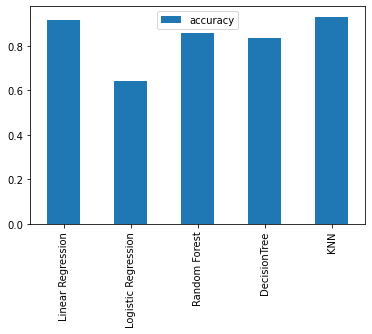

In [64]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();